In [13]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression refresher

Some random data

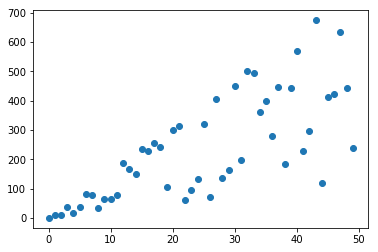

In [28]:
y = np.array([0.72*i*np.random.randint(1,20) + 2*i for i in range(50)])
x = np.array([i for i in range(len(y))])
plt.scatter(x,y);

Now to Linear Regret it.

In [29]:
from sklearn.linear_model import LinearRegression
a = LinearRegression()

#putting the input data into a df to feed to the LM model as it doesn't like 1d arrays
df = pd.DataFrame(x, columns=['Input'])
df.head()

,Input
0,0
1,1
2,2
3,3
4,4


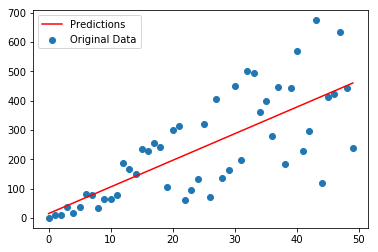

In [30]:
a.fit(df, y)
plt.scatter(x,y, label='Original Data')
plt.plot(a.predict(df), color='r', label='Predictions')
plt.legend();

Split your data set into testing and training:

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df,y)
len(x_train), len(x_test), len(y_train), len(y_test)

(37, 13, 37, 13)

Here we can see the model does a relatively good job of predicting the data it was trained on:

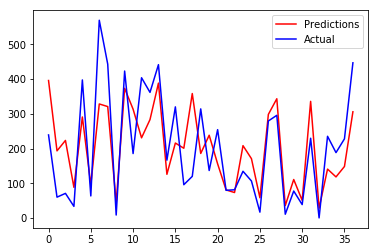

In [48]:
a2 = LinearRegression()
a2.fit(x_train,y_train)
a2.predict(x_test)

#plt.scatter(x,y, label='Original Data')
plt.plot(a2.predict(x_train), color='r', label='Predictions')
plt.plot(y_train, label="Actual", color="b")
plt.legend();

But it doesn't do a good job on the test data:

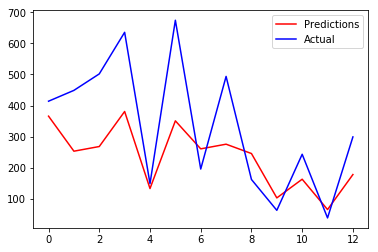

In [49]:
#plt.scatter(x,y, label='Original Data')
plt.plot(a2.predict(x_test), color='r', label='Predictions')
plt.plot(y_test, label="Actual", color="b")
plt.legend();

# Another data set

In [10]:
boston = datasets.load_boston()
data = pd.DataFrame(boston.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
target = boston.target
target.shape

(506,)

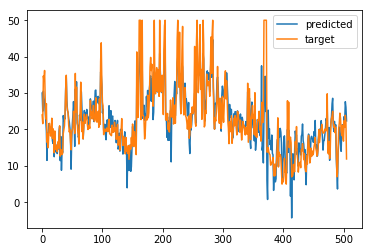

In [12]:
lm = LinearRegression()
lm.fit(data, target)
predicted = lm.predict(data)
plt.plot(predicted, label='predicted')
plt.plot(target, label='target')
plt.legend();

## R2 score

- simplest possible model is to take the avg of all values and draw a straight line, then calculate the mean square error
- the R2 score is 1 minus the error of our regression model divided by the error of the simplest possible model
- if we have a good model, the error will be small compared to the simple model, thus R2 will be close to 1
- for a bad model, the ratio of errors will be closer to 1, giving a small R2 values

In [50]:
from sklearn.metrics import r2_score
r2_score(target,predicted)

0.7406077428649428